In [1]:
import numpy as np
import pandas as pd
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
#matplotlib.rc_file("../../templates/matplotlibrc")
import matplotlib.pyplot as plt
matplotlib.rc('text', usetex=True)
import os
os.getcwd()

'C:\\Users\\kreativekeith422\\Desktop\\thesis\\GALPROP'

In [2]:
# get FITS capabilities
from astropy.io import fits
# get tar working lib
import tarfile
import cosmic_ray_nuclei_index
from cosmic_ray_nuclei_index import rigidity_calc, undo_log_energy, log_energy
from get_splines import *

In [3]:
###FLUXES### in order as the elements we have above
fluxes_per_element_full=[]
fluxes_per_element_per_fits_file=[] # clear this after every load of a fits file
tar = tarfile.open("runs_L_D.tar.gz")
i=0
tots=0
list_found=[]
while i<len(tar.getmembers()):
    if tar.getmembers()[i].isfile():
        if tar.getmembers()[i].name.find('nuclei_full') !=-1:
            list_found.append(i)
            print(tar.getmembers()[i].name)
        # find the string nuclei_full in the filenam
            tots+=1
    i+=1
print(tots)
k=0
names=[]
FITS_data_full=[]
while k<10:
#while k<len(list_found):
    fluxes_per_element_per_fits_file=[]
    j=list_found[k]
    open_file=tar.extractfile(tar.getmembers()[j].name)
    fileFITS_data = fits.getdata(open_file)
    print(type(fileFITS_data))
    print(fileFITS_data.shape)
    for i in cosmic_ray_nuclei_index.element_index: fluxes_per_element_per_fits_file.append(
        fileFITS_data[i,:,cosmic_ray_nuclei_index.z_loc,cosmic_ray_nuclei_index.y_loc,cosmic_ray_nuclei_index.x_loc])
    fluxes_per_element_per_fits_file.append(tar.getmembers()[j].name)
    #FITS_data_full.append(fileFITS_data)
    # append to the arrays we need instead:
    names.append(tar.getmembers()[j].name)
    fluxes_per_element_full.append(fluxes_per_element_per_fits_file)
    k+=1
tar.close()

GALPROP/runs_L_D/L_10_D_10/nuclei_full_56_L_10_D_10
GALPROP/runs_L_D/L_10_D_11/nuclei_full_56_L_10_D_11
GALPROP/runs_L_D/L_10_D_12/nuclei_full_56_L_10_D_12
GALPROP/runs_L_D/L_10_D_3/nuclei_full_56_L_10_D_3
GALPROP/runs_L_D/L_10_D_4/nuclei_full_56_L_10_D_4
GALPROP/runs_L_D/L_10_D_5/nuclei_full_56_L_10_D_5
GALPROP/runs_L_D/L_10_D_6/nuclei_full_56_L_10_D_6
GALPROP/runs_L_D/L_10_D_7/nuclei_full_56_L_10_D_7
GALPROP/runs_L_D/L_10_D_8/nuclei_full_56_L_10_D_8
GALPROP/runs_L_D/L_10_D_9/nuclei_full_56_L_10_D_9
GALPROP/runs_L_D/L_1_D_10/nuclei_full_56_L_1_D_10
GALPROP/runs_L_D/L_1_D_11/nuclei_full_56_L_1_D_11
GALPROP/runs_L_D/L_1_D_12/nuclei_full_56_L_1_D_12
GALPROP/runs_L_D/L_1_D_3/nuclei_full_56_L_1_D_3
GALPROP/runs_L_D/L_1_D_4/nuclei_full_56_L_1_D_4
GALPROP/runs_L_D/L_1_D_5/nuclei_full_56_L_1_D_5
GALPROP/runs_L_D/L_1_D_6/nuclei_full_56_L_1_D_6
GALPROP/runs_L_D/L_1_D_7/nuclei_full_56_L_1_D_7
GALPROP/runs_L_D/L_1_D_8/nuclei_full_56_L_1_D_8
GALPROP/runs_L_D/L_1_D_9/nuclei_full_56_L_1_D_9
GALPROP/

In [4]:
#get energy axis and change to GeV (undo the logarithm to put in actual energy units)
energy=np.arange(2,9,0.304347391792257)
energy=undo_log_energy(energy)
energy=np.true_divide(energy,10**3)
print(energy)

[1.00000000e-01 2.01533567e-01 4.06157787e-01 8.18544275e-01
 1.64964148e+00 3.32458131e+00 6.70014730e+00 1.35030459e+01
 2.72131700e+01 5.48436722e+01 1.10528409e+02 2.22751845e+02
 4.48919739e+02 9.04723963e+02 1.82332247e+03 3.67460682e+03
 7.40556620e+03 1.49247017e+04 3.00782838e+04 6.06178382e+04
 1.22165292e+05 2.46204070e+05 4.96183844e+05 9.99977000e+05]


In [5]:
# the energy array is the same for all isotopes
# however, the rigidity is different and need to make sure energy is in GeV when using this function
rig_be_10=rigidity_calc(energy,10,4) # need to make sure energy is not log-energy
rig_be_9=rigidity_calc(energy,9,4)
print(rig_be_10)
print(rig_be_9)
rig_be_10_logged=log_energy(rig_be_10)
rig_be_9_logged=log_energy(rig_be_9)
print(rig_be_10_logged)
print(rig_be_9_logged)

[1.11130554e+00 1.61766180e+00 2.40691212e+00 3.71281883e+00
 6.02911913e+00 1.03952379e+01 1.89508328e+01 3.60263759e+01
 7.03388463e+01 1.39434463e+02 2.78656155e+02 5.59219696e+02
 1.12464190e+03 2.26415369e+03 4.56065058e+03 9.18886175e+03
 1.85162604e+04 3.73140992e+04 7.51980544e+04 1.51546940e+05
 3.05415574e+05 6.15512520e+05 1.24046196e+06 2.49994485e+06]
[1.00017498e+00 1.45589562e+00 2.16622091e+00 3.34153695e+00
 5.42620722e+00 9.35571413e+00 1.70557495e+01 3.24237383e+01
 6.33049616e+01 1.25491016e+02 2.50790540e+02 5.03297726e+02
 1.01217771e+03 2.03773832e+03 4.10458552e+03 8.26997558e+03
 1.66646343e+04 3.35826893e+04 6.76782489e+04 1.36392246e+05
 2.74874017e+05 5.53961268e+05 1.11641576e+06 2.24995036e+06]
[0.04583347879784221, 0.2088877293091977, 0.3814602344068792, 0.5697037583836451, 0.7802538655346016, 1.016834433558289, 1.2776282999402178, 1.5566205758995504, 1.8471952405317673, 2.144370127737939, 2.445068640552798, 2.747582458778383, 3.051014260488261, 3.3549059

In [6]:
# to get the spline in rigidity space, need to use the logged rigidity values and the logged flux values (probably?)
# now need to find the lowest rigidity and highest rigidity that can be splined. This means the second lowest and second highest (so that both splines are only fitting inside of the data).
# just compare the last elements and the first elements. 
def find_second_max_min(x_1,x_2):
    if x_1[0] < x_2[0]: # these are finding the second lowest value (not the actual minimum)
        minimum=x_2[0]
    else:
        minimum=x_1[0]
    if x_1[-1]> x_2[-1]: # find the second highest value.
        maximum=x_2[-1]
    else:
        maximum=x_1[-1]
    return minimum, maximum

In [7]:
min_R,max_R=find_second_max_min(rig_be_10_logged,rig_be_9_logged)
print(min_R)
print(max_R)

0.04583347879784221
6.35217293671049


In [8]:
model=0
log_Be_10_flux=log_energy(fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.be10_loc)])
log_Be_9_flux=log_energy(fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.be9_loc)])

print(fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.be10_loc)])
print(log_Be_10_flux)

[1.3677109e-05 7.7644880e-05 3.0494350e-04 8.0169691e-04 1.4583530e-03
 1.9340274e-03 1.9142324e-03 1.4985966e-03 9.9654356e-04 5.9721153e-04
 3.2949517e-04 1.7394008e-04 8.9788366e-05 4.5915742e-05 2.3414237e-05
 1.1894106e-05 6.0195948e-06 3.0374540e-06 1.5288134e-06 7.6752281e-07
 3.8457267e-07 1.9242027e-07 9.6114945e-08 4.7258837e-08]
[-4.8640056, -4.109887, -3.5157807, -3.0959897, -2.8361373, -2.7135375, -2.7180054, -2.8243153, -3.0015037, -3.2238717, -3.482151, -3.7596004, -4.04678, -4.3380384, -4.63052, -4.9246683, -5.2204328, -5.5174904, -5.8156457, -6.1149087, -6.4150214, -6.7157493, -7.017209, -7.325517]


In [9]:
model=0
num_steps=200
rig_be_9_spline_logged, flux_be_9_spline_logged=spline(rig_be_9_logged,log_Be_9_flux, num_steps,min_R,max_R)
rig_be_10_spline_logged, flux_be_10_spline_logged=spline(rig_be_10_logged,log_Be_10_flux, num_steps,min_R,max_R)

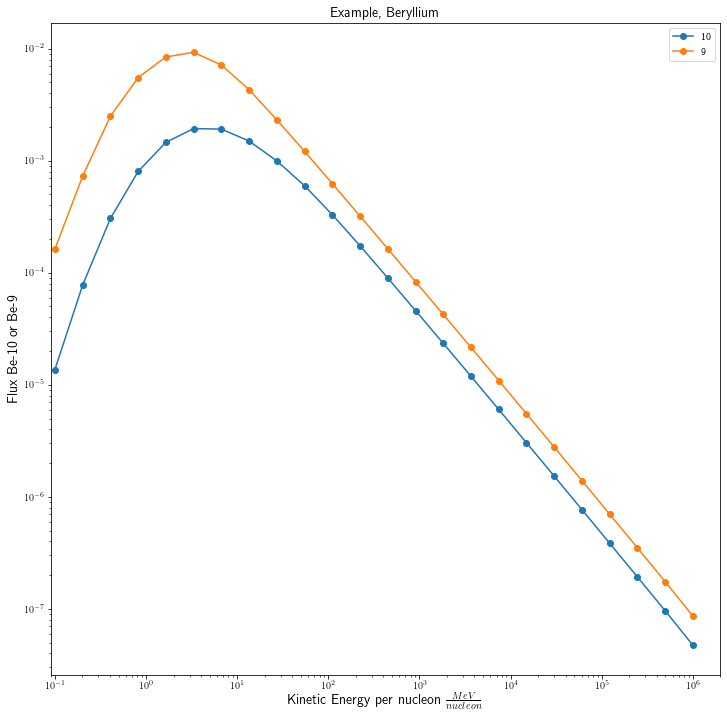

In [10]:
# check the fluxes (versus kinetic energy per nucleon and rigidity)
plt.figure(figsize=(12,12))
model=0
fnt=14
x1=0.9*10**-1
x2=2*10**6
plt.plot(energy,fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.be10_loc)],'-o',label="10")
plt.plot(energy,fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.be9_loc)],'-o',label="9")

#plt.plot(energy,be_10_be_9_5,'-o',label="L=5")
plt.xscale("log")
plt.xlabel("Kinetic Energy per nucleon "r'$\frac{MeV}{nucleon}$',fontsize=fnt)
plt.xticks(fontsize=fnt-4)
plt.yscale("log")
plt.ylabel("Flux Be-10 or Be-9",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
plt.xlim([x1,x2])
plt.legend(loc='upper right', fontsize=fnt-4)
plt.title("Example, Beryllium", fontsize=fnt)
plt.savefig("be_flux.png")
plt.show()

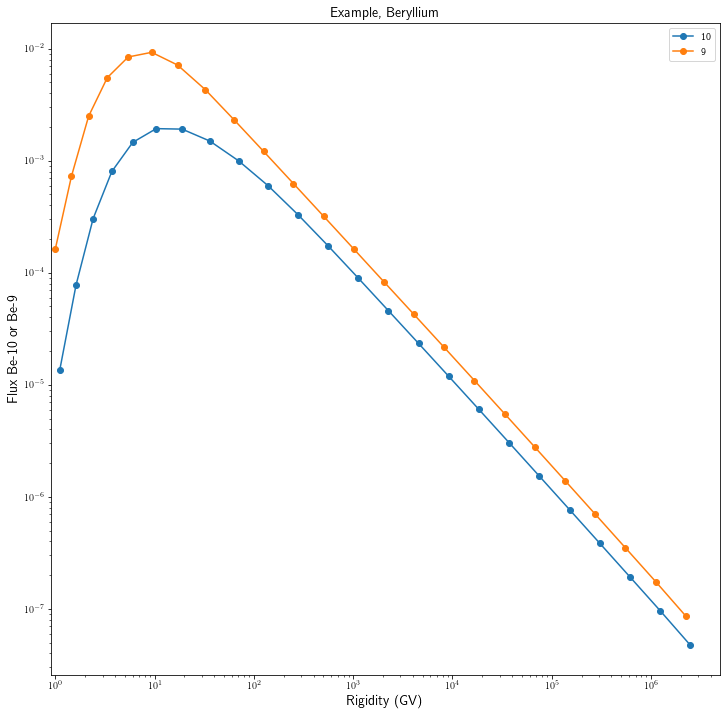

In [11]:
plt.figure(figsize=(12,12))
model=0
fnt=14
x1=0.9*rig_be_9[0]
x2=2*rig_be_10[-1]
plt.plot(rig_be_10,fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.be10_loc)],'-o',label="10")
plt.plot(rig_be_9,fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.be9_loc)],'-o',label="9")

#plt.plot(energy,be_10_be_9_5,'-o',label="L=5")
plt.xscale("log")
plt.xlabel("Rigidity (GV)",fontsize=fnt)
plt.xticks(fontsize=fnt-4)
plt.yscale("log")
plt.ylabel("Flux Be-10 or Be-9",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
plt.xlim([x1,x2])
plt.legend(loc='upper right', fontsize=fnt-4)
plt.title("Example, Beryllium", fontsize=fnt)
plt.savefig("be_flux_rigidity.png")
plt.show()

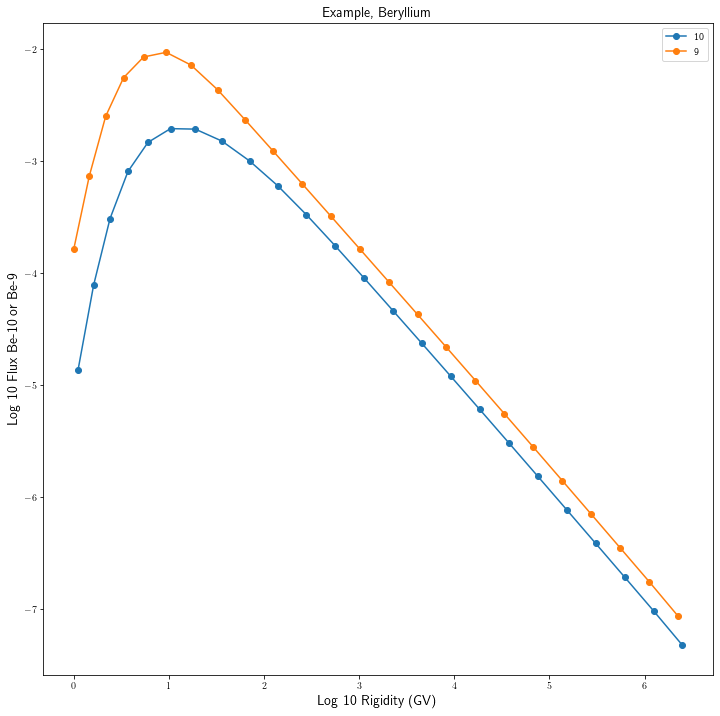

In [12]:
plt.figure(figsize=(12,12))
model=0
fnt=14
plt.plot(rig_be_10_logged,log_Be_10_flux,'-o',label="10")
plt.plot(rig_be_9_logged,log_Be_9_flux,'-o',label="9")

#plt.plot(energy,be_10_be_9_5,'-o',label="L=5")
#plt.xscale("log")
plt.xlabel("Log 10 Rigidity (GV)",fontsize=fnt)
plt.xticks(fontsize=fnt-4)
#plt.yscale("log")
plt.ylabel("Log 10 Flux Be-10 or Be-9",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
#plt.xlim([x1,x2])
plt.legend(loc='upper right', fontsize=fnt-4)
plt.title("Example, Beryllium", fontsize=fnt)
plt.savefig("be_flux_rigidity_logged.png")
plt.show()

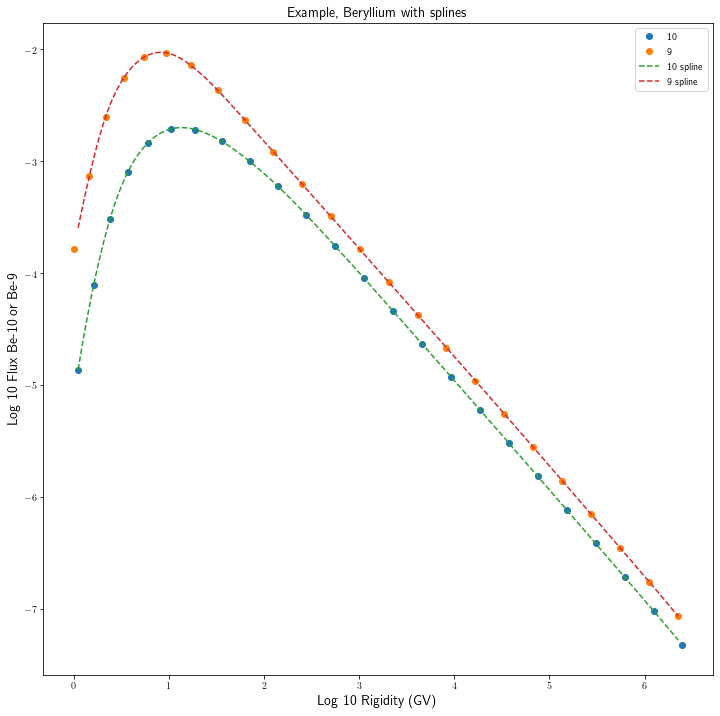

In [13]:
# check the splines on the rigidity plots, starting with the log plots
plt.figure(figsize=(12,12))
model=0
fnt=14
plt.plot(rig_be_10_logged,log_Be_10_flux,'o',label="10")
plt.plot(rig_be_9_logged,log_Be_9_flux,'o',label="9")
plt.plot(rig_be_10_spline_logged, flux_be_10_spline_logged,'--',label="10 spline")
plt.plot(rig_be_9_spline_logged, flux_be_9_spline_logged,'--',label="9 spline")
#plt.plot(energy,be_10_be_9_5,'-o',label="L=5")
#plt.xscale("log")
plt.xlabel("Log 10 Rigidity (GV)",fontsize=fnt)
plt.xticks(fontsize=fnt-4)
#plt.yscale("log")
plt.ylabel("Log 10 Flux Be-10 or Be-9",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
#plt.xlim([x1,x2])
plt.legend(loc='upper right', fontsize=fnt-4)
plt.title("Example, Beryllium with splines", fontsize=fnt)
plt.savefig("be_flux_rigidity_logged_with_splines.png")
plt.show()

In [15]:
# undo the logarithm
rig_be_10_spline=undo_log_energy(rig_be_10_spline_logged)
flux_be_10_spline=undo_log_energy(flux_be_10_spline_logged)
rig_be_9_spline=undo_log_energy(rig_be_9_spline_logged)
flux_be_9_spline=undo_log_energy(flux_be_9_spline_logged)
#add the fluxes together
flux_be_total_spline=np.add(flux_be_9_spline,flux_be_10_spline)

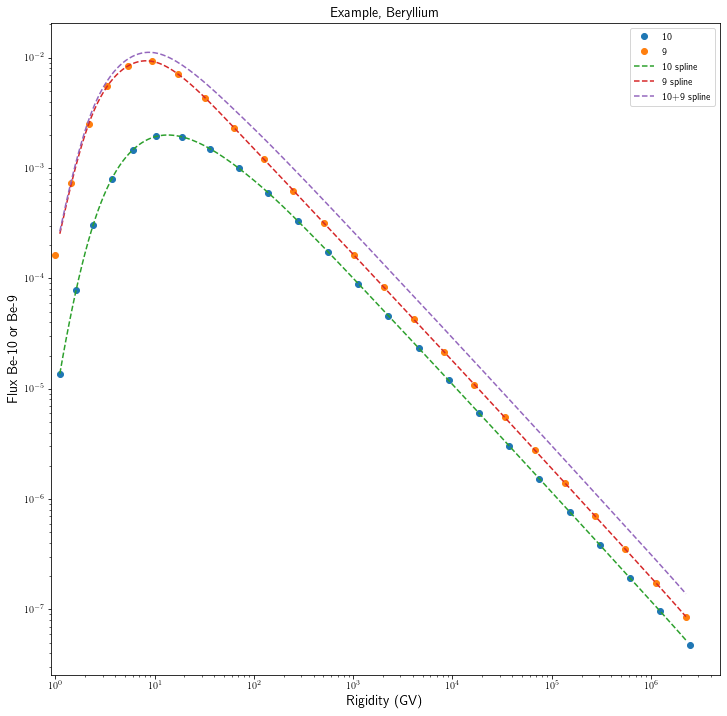

In [16]:
plt.figure(figsize=(12,12))
model=0
fnt=14
x1=0.9*rig_be_9[0]
x2=2*rig_be_10[-1]
plt.plot(rig_be_10,fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.be10_loc)],'o',label="10")
plt.plot(rig_be_9,fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.be9_loc)],'o',label="9")
plt.plot(rig_be_10_spline, flux_be_10_spline,'--',label="10 spline")
plt.plot(rig_be_9_spline, flux_be_9_spline,'--',label="9 spline")
plt.plot(rig_be_9_spline, flux_be_total_spline,'--',label="10+9 spline")

#plt.plot(energy,be_10_be_9_5,'-o',label="L=5")
plt.xscale("log")
plt.xlabel("Rigidity (GV)",fontsize=fnt)
plt.xticks(fontsize=fnt-4)
plt.yscale("log")
plt.ylabel("Flux Be-10 or Be-9",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
plt.xlim([x1,x2])
plt.legend(loc='upper right', fontsize=fnt-4)
plt.title("Example, Beryllium", fontsize=fnt)
plt.savefig("be_flux_rigidity_with_splines.png")
plt.show()

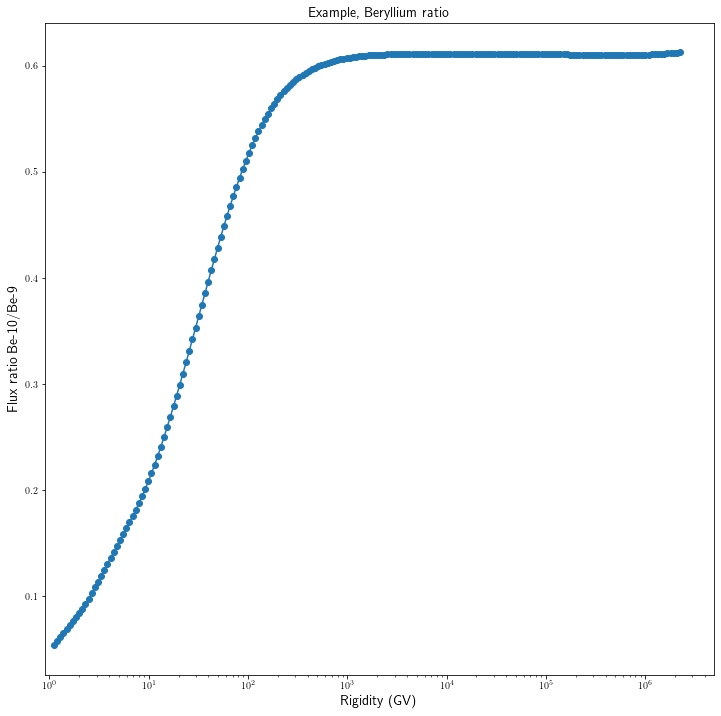

In [17]:
#Try plotting the ratio vs rigidity just for fun
ratio_spline=np.divide(flux_be_10_spline,flux_be_9_spline)
plt.figure(figsize=(12,12))
model=0
fnt=14
x1=0.9*rig_be_9[0]
x2=2*rig_be_10[-1]
plt.plot(rig_be_10_spline, ratio_spline,'-o')
#plt.plot(energy,be_10_be_9_5,'-o',label="L=5")
plt.xscale("log")
plt.xlabel("Rigidity (GV)",fontsize=fnt)
plt.xticks(fontsize=fnt-4)
#plt.yscale("log")
plt.ylabel("Flux ratio Be-10/Be-9",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
plt.xlim([x1,x2])
#plt.legend(loc='upper right', fontsize=fnt-4)
plt.title("Example, Beryllium ratio", fontsize=fnt)
plt.savefig("be_ratio_rigidity_with_splines.png")
plt.show()

In [18]:
#Seems like the spline addition is working. Now what we can do is make some of these into useful functions and compact the code
def gimme_Be_rigidity_arrays(energy):
    rig_be_10=rigidity_calc(energy,10,4) # need to make sure energy is not log-energy
    rig_be_9=rigidity_calc(energy,9,4)
    rig_be_7=rigidity_calc(energy,7,4)
    return rig_be_10,rig_be_9, rig_be_7
def find_third_max_min(x_1,x_2,x_3):
    min_list=[x_1[0],x_2[0],x_3[0]]
    max_list=[x_1[-1],x_2[-1],x_3[-1]]
    return max(min_list),min(max_list)

In [19]:
rigBe10,rigBe9,rigBe7=gimme_Be_rigidity_arrays(energy)
rigBe10_logged=log_energy(rigBe10)
rigBe9_logged=log_energy(rigBe9)
rigBe7_logged=log_energy(rigBe7)
Bemin_R,Bemax_R=find_third_max_min(rigBe10_logged,rigBe9_logged,rigBe7_logged)
model=0
logBe10_flux=log_energy(fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.be10_loc)])
logBe9_flux=log_energy(fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.be9_loc)])
logBe7_flux=log_energy(fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.be7_loc)])
num_steps=200
rigBe7_spline_logged, Be7_flux_spline_logged=spline(rigBe7_logged,logBe7_flux, num_steps,Bemin_R,Bemax_R)
rigBe9_spline_logged, Be9_flux_spline_logged=spline(rigBe9_logged,logBe9_flux, num_steps,Bemin_R,Bemax_R)
rigBe10_spline_logged, Be10_flux_spline_logged=spline(rigBe10_logged,logBe10_flux, num_steps,Bemin_R,Bemax_R)
# undo the logarithm
rigBe10_spline=undo_log_energy(rigBe10_spline_logged)
rigBe9_spline=undo_log_energy(rigBe9_spline_logged)
rigBe7_spline=undo_log_energy(rigBe7_spline_logged)
Be10_flux_spline=undo_log_energy(Be10_flux_spline_logged)
Be9_flux_spline=undo_log_energy(Be9_flux_spline_logged)
Be7_flux_spline=undo_log_energy(Be7_flux_spline_logged)
#add the fluxes together
Be_total_flux_spline=np.add(Be7_flux_spline,np.add(Be10_flux_spline,Be9_flux_spline))

In [20]:
print(Bemin_R)
print(Bemax_R)
print(Be10_flux_spline_logged)

0.04583347879784221
6.243028467285422
[-4.86400557 -4.7055604  -4.55391342 -4.40907257 -4.27104579 -4.13984101
 -4.01546618 -3.89792922 -3.78723808 -3.6834007  -3.58642501 -3.49631832
 -3.41298654 -3.33612318 -3.26539502 -3.20046885 -3.14101144 -3.08668963
 -3.03718417 -2.99220883 -2.9514822  -2.91472285 -2.88164937 -2.85198032
 -2.82543632 -2.80180954 -2.78098106 -2.76283757 -2.74726572 -2.73415216
 -2.72338357 -2.7148466  -2.70842912 -2.70402735 -2.70154106 -2.70087002
 -2.70191401 -2.70457282 -2.70874621 -2.71433397 -2.72123653 -2.72937407
 -2.73868958 -2.74912727 -2.7606314  -2.77314618 -2.78661586 -2.80098467
 -2.81619684 -2.83219693 -2.84893748 -2.86637929 -2.88448353 -2.90321137
 -2.92252401 -2.94238261 -2.96274836 -2.98358242 -3.00484602 -3.02651033
 -3.0485718  -3.07103079 -3.09388766 -3.11714279 -3.14079654 -3.16484927
 -3.18930135 -3.21415315 -3.23940406 -3.26503954 -3.29103474 -3.31736453
 -3.34400381 -3.37092747 -3.39811039 -3.42552746 -3.45315356 -3.4809636
 -3.50893514 -

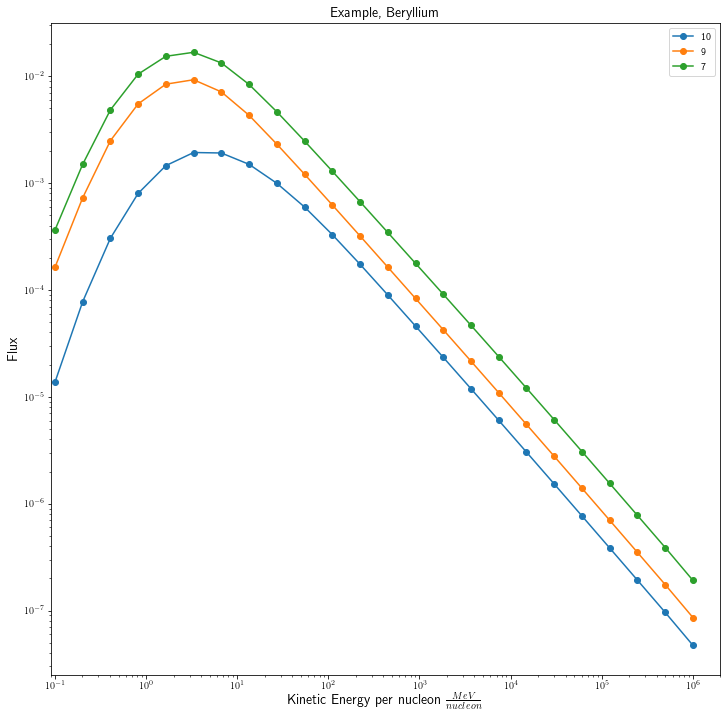

In [21]:
# check the fluxes (versus kinetic energy per nucleon and rigidity)
plt.figure(figsize=(12,12))
model=0
fnt=14
x1=0.9*10**-1
x2=2*10**6
plt.plot(energy,fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.be10_loc)],'-o',label="10")
plt.plot(energy,fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.be9_loc)],'-o',label="9")
plt.plot(energy,fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.be7_loc)],'-o',label="7")

#plt.plot(energy,be_10_be_9_5,'-o',label="L=5")
plt.xscale("log")
plt.xlabel("Kinetic Energy per nucleon "r'$\frac{MeV}{nucleon}$',fontsize=fnt)
plt.xticks(fontsize=fnt-4)
plt.yscale("log")
plt.ylabel("Flux",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
plt.xlim([x1,x2])
plt.legend(loc='upper right', fontsize=fnt-4)
plt.title("Example, Beryllium", fontsize=fnt)
plt.savefig("be_flux_all_isotopes.png")
plt.show()

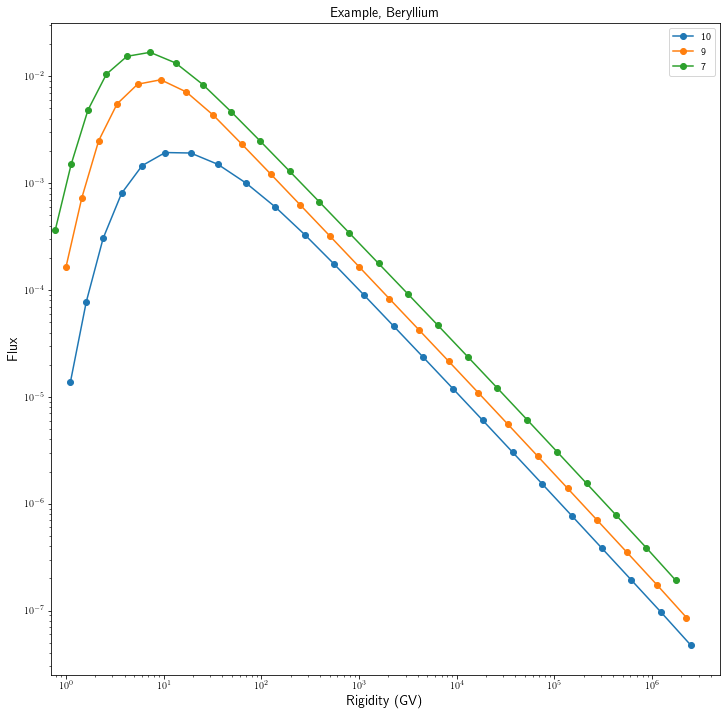

In [61]:
plt.figure(figsize=(12,12))
model=0
fnt=14
x1=0.9*rigBe7[0]
x2=2*rigBe10[-1]
plt.plot(rigBe10,fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.be10_loc)],'-o',label="10")
plt.plot(rigBe9,fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.be9_loc)],'-o',label="9")
plt.plot(rigBe7,fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.be7_loc)],'-o',label="7")

#plt.plot(energy,be_10_be_9_5,'-o',label="L=5")
plt.xscale("log")
plt.xlabel("Rigidity (GV)",fontsize=fnt)
plt.xticks(fontsize=fnt-4)
plt.yscale("log")
plt.ylabel("Flux",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
plt.xlim([x1,x2])
plt.legend(loc='upper right', fontsize=fnt-4)
plt.title("Example, Beryllium", fontsize=fnt)
plt.savefig("be_flux_rigidity_all_isotopes.png")
plt.show()

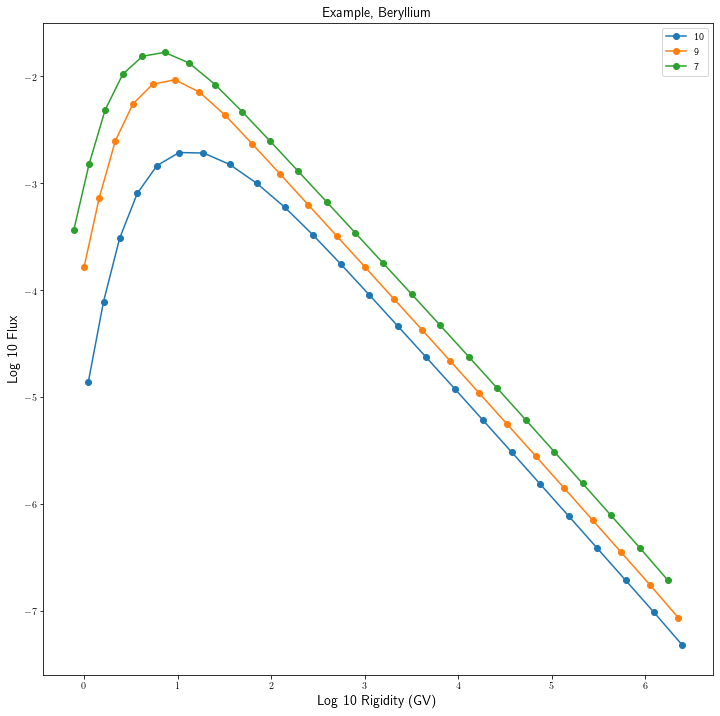

In [22]:
plt.figure(figsize=(12,12))
model=0
fnt=14
plt.plot(rigBe10_logged,logBe10_flux,'-o',label="10")
plt.plot(rigBe9_logged,logBe9_flux,'-o',label="9")
plt.plot(rigBe7_logged,logBe7_flux,'-o',label="7")

#plt.plot(energy,be_10_be_9_5,'-o',label="L=5")
#plt.xscale("log")
plt.xlabel("Log 10 Rigidity (GV)",fontsize=fnt)
plt.xticks(fontsize=fnt-4)
#plt.yscale("log")
plt.ylabel("Log 10 Flux",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
#plt.xlim([x1,x2])
plt.legend(loc='upper right', fontsize=fnt-4)
plt.title("Example, Beryllium", fontsize=fnt)
plt.savefig("be_flux_rigidity_logged_all_isotopes.png")
plt.show()

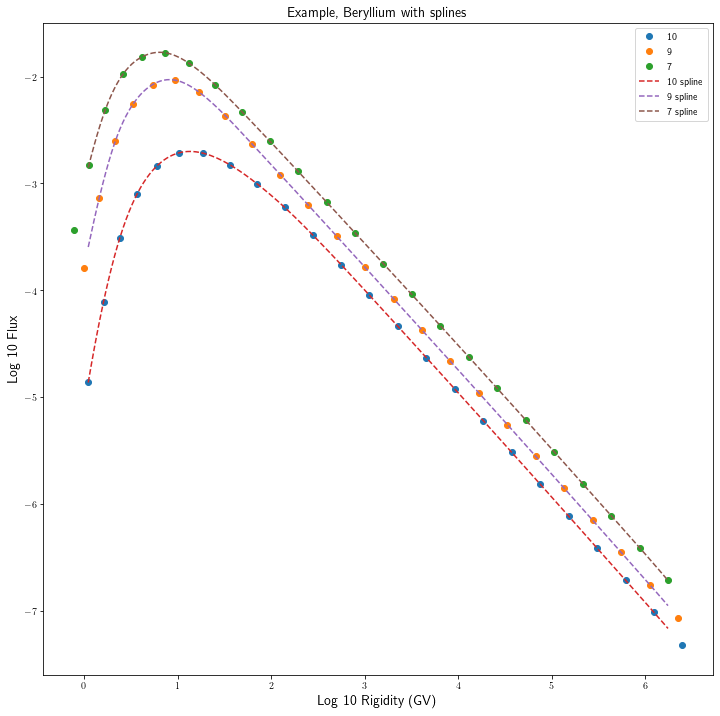

In [23]:
# check the splines on the rigidity plots, starting with the log plots
plt.figure(figsize=(12,12))
model=0
fnt=14
plt.plot(rigBe10_logged,logBe10_flux,'o',label="10")
plt.plot(rigBe9_logged,logBe9_flux,'o',label="9")
plt.plot(rigBe7_logged,logBe7_flux,'o',label="7")
plt.plot(rigBe10_spline_logged, Be10_flux_spline_logged,'--',label="10 spline")
plt.plot(rigBe9_spline_logged, Be9_flux_spline_logged,'--',label="9 spline")
plt.plot(rigBe7_spline_logged, Be7_flux_spline_logged,'--',label="7 spline")
#plt.plot(energy,be_10_be_9_5,'-o',label="L=5")
#plt.xscale("log")
plt.xlabel("Log 10 Rigidity (GV)",fontsize=fnt)
plt.xticks(fontsize=fnt-4)
#plt.yscale("log")
plt.ylabel("Log 10 Flux",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
#plt.xlim([x1,x2])
plt.legend(loc='upper right', fontsize=fnt-4)
plt.title("Example, Beryllium with splines", fontsize=fnt)
plt.savefig("be_flux_rigidity_logged_with_splines_all_isotopes.png")
plt.show()

In [24]:
# undo the logarithm
rigBe10_spline=undo_log_energy(rigBe10_spline_logged)
rigBe9_spline=undo_log_energy(rigBe9_spline_logged)
rigBe7_spline=undo_log_energy(rigBe7_spline_logged)
Be10_flux_spline=undo_log_energy(Be10_flux_spline_logged)
Be9_flux_spline=undo_log_energy(Be9_flux_spline_logged)
Be7_flux_spline=undo_log_energy(Be7_flux_spline_logged)
#add the fluxes together
Be_total_flux_spline=np.add(Be7_flux_spline,np.add(Be10_flux_spline,Be9_flux_spline))

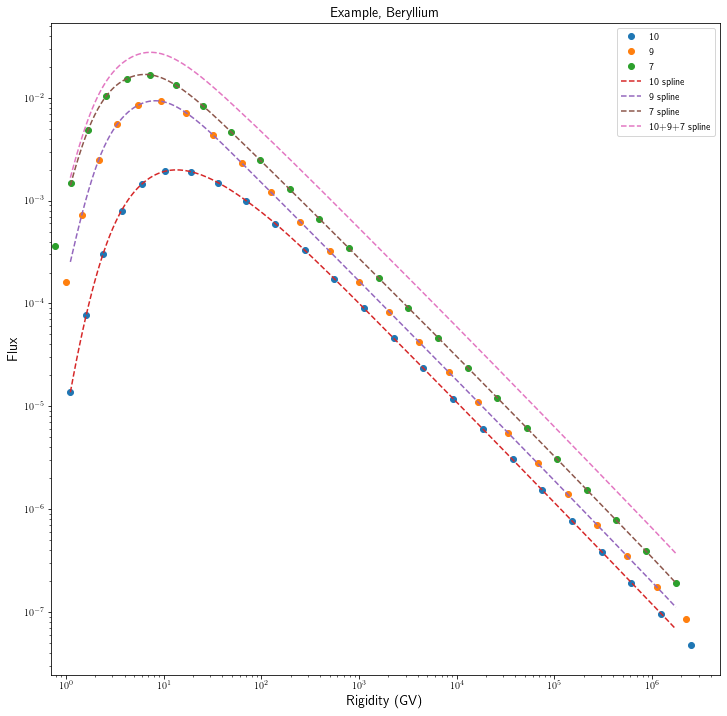

In [25]:
plt.figure(figsize=(12,12))
model=0
fnt=14
x1=0.9*rigBe7[0]
x2=2*rigBe10[-1]
plt.plot(rigBe10,fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.be10_loc)],'o',label="10")
plt.plot(rigBe9,fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.be9_loc)],'o',label="9")
plt.plot(rigBe7,fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.be7_loc)],'o',label="7")


plt.plot(rigBe10_spline, Be10_flux_spline,'--',label="10 spline")
plt.plot(rigBe9_spline, Be9_flux_spline,'--',label="9 spline")
plt.plot(rigBe7_spline, Be7_flux_spline,'--',label="7 spline")
plt.plot(rigBe7_spline, Be_total_flux_spline,'--',label="10+9+7 spline")

#plt.plot(energy,be_10_be_9_5,'-o',label="L=5")
plt.xscale("log")
plt.xlabel("Rigidity (GV)",fontsize=fnt)
plt.xticks(fontsize=fnt-4)
plt.yscale("log")
plt.ylabel("Flux",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
plt.xlim([x1,x2])
plt.legend(loc='upper right', fontsize=fnt-4)
plt.title("Example, Beryllium", fontsize=fnt)
plt.savefig("be_flux_rigidity_with_splines_all_isotopes.png")
plt.show()

In [26]:
# now try boron(10 and 11) and carbon(12 and 13)
#Seems like the spline addition is working. Now what we can do is make some of these into useful functions and compact the code
def gimme_B_rigidity_arrays(energy):
    rig_B_10=rigidity_calc(energy,10,5) # need to make sure energy is not log-energy
    rig_B_11=rigidity_calc(energy,11,5)
    return rig_B_10, rig_B_11

def gimme_C_rigidity_arrays(energy):
    rig_C_12=rigidity_calc(energy,12,6) # need to make sure energy is not log-energy
    rig_C_13=rigidity_calc(energy,13,6)
    return rig_C_12, rig_C_13


In [41]:
model=5
num_steps=200

#Boron
rigB10,rigB11=gimme_B_rigidity_arrays(energy)
rigB10_logged=log_energy(rigB10)
rigB11_logged=log_energy(rigB11)
Bmin_R,Bmax_R=find_second_max_min(rigB10_logged,rigB11_logged)
logB10_flux=log_energy(fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.boron10_loc)])
logB11_flux=log_energy(fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.boron11_loc)])
rigB10_spline_logged, B10_flux_spline_logged=spline(rigB10_logged,logB10_flux, num_steps,Bmin_R,Bmax_R)
rigB11_spline_logged, B11_flux_spline_logged=spline(rigB11_logged,logB11_flux, num_steps,Bmin_R,Bmax_R)
# undo the logarithm
rigB10_spline=undo_log_energy(rigB10_spline_logged)
rigB11_spline=undo_log_energy(rigB11_spline_logged)
B10_flux_spline=undo_log_energy(B10_flux_spline_logged)
B11_flux_spline=undo_log_energy(B11_flux_spline_logged)
#add the fluxes together
B_total_flux_spline=np.add(B10_flux_spline,B11_flux_spline)

#Carbon
rigC12,rigC13=gimme_C_rigidity_arrays(energy)
rigC12_logged=log_energy(rigC12)
rigC13_logged=log_energy(rigC13)
Cmin_R,Cmax_R=find_second_max_min(rigC12_logged,rigC13_logged)
logC12_flux=log_energy(fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.carbon12_loc)])
logC13_flux=log_energy(fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.carbon13_loc)])
rigC12_spline_logged, C12_flux_spline_logged=spline(rigC12_logged,logC12_flux, num_steps,Cmin_R,Cmax_R)
rigC13_spline_logged, C13_flux_spline_logged=spline(rigC13_logged,logC13_flux, num_steps,Cmin_R,Cmax_R)
# undo the logarithm
rigC12_spline=undo_log_energy(rigC12_spline_logged)
rigC13_spline=undo_log_energy(rigC13_spline_logged)
C12_flux_spline=undo_log_energy(C12_flux_spline_logged)
C13_flux_spline=undo_log_energy(C13_flux_spline_logged)
#add the fluxes together
C_total_flux_spline=np.add(C12_flux_spline,C13_flux_spline)

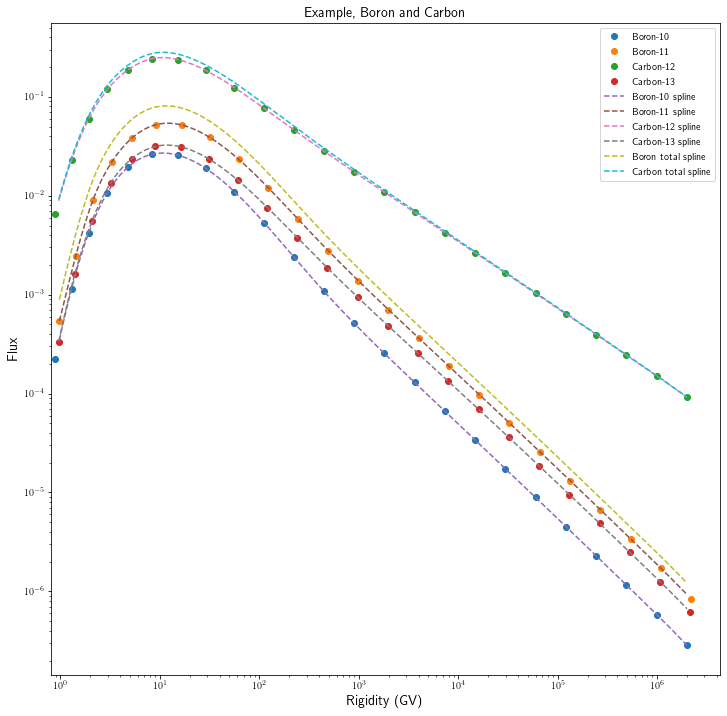

In [43]:
plt.figure(figsize=(12,12))
model=5
fnt=14
x1=0.9*rigB10[0]
x2=2*rigC13[-1]

plt.plot(rigB10,fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.boron10_loc)],'o',label="Boron-10")
plt.plot(rigB11,fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.boron11_loc)],'o',label="Boron-11")
plt.plot(rigC12,fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.carbon12_loc)],'o',label="Carbon-12")
plt.plot(rigC13,fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.carbon13_loc)],'o',label="Carbon-13")


plt.plot(rigB10_spline, B10_flux_spline,'--',label="Boron-10 spline")
plt.plot(rigB11_spline, B11_flux_spline,'--',label="Boron-11 spline")
plt.plot(rigC12_spline, C12_flux_spline,'--',label="Carbon-12 spline")
plt.plot(rigC13_spline, C13_flux_spline,'--',label="Carbon-13 spline")

plt.plot(rigB11_spline, B_total_flux_spline,'--',label="Boron total spline")
plt.plot(rigC13_spline, C_total_flux_spline,'--',label="Carbon total spline")

#plt.plot(energy,be_10_be_9_5,'-o',label="L=5")
plt.xscale("log")
plt.xlabel("Rigidity (GV)",fontsize=fnt)
plt.xticks(fontsize=fnt-4)
plt.yscale("log")
plt.ylabel("Flux",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
plt.xlim([x1,x2])
plt.legend(loc='upper right', fontsize=fnt-4)
plt.title("Example, Boron and Carbon", fontsize=fnt)
plt.savefig("Boron_carbon_flux_rigidity_with_splines_all_isotopes.png")
plt.show()

In [29]:
def find_interpolation_range(*argv):
    min_list=[]
    max_list=[]
    for arg in argv:
        min_list.append(arg[0])
        max_list.append(arg[-1])
    return max(min_list),min(max_list)
    #min_list=[x_1[0],x_2[0],x_3[0]]
    #max_list=[x_1[-1],x_2[-1],x_3[-1]]
    #return max(min_list),min(max_list)

In [30]:
print(find_interpolation_range(rigBe10_logged,rigBe9_logged,rigBe7_logged))

(0.04583347879784221, 6.243028467285422)


In [31]:
print(Bemin_R,Bemax_R)

0.04583347879784221 6.243028467285422


In [44]:
# now try Boron/Carbon ratio with new splines for all isotopes inside of Boron-Carbon rigidity range
BCmin_R,BCmax_R=find_interpolation_range(rigB10_logged,rigB11_logged,rigC12_logged,rigC13_logged)
rigB10_spline_logged, B10_flux_spline_logged=spline(rigB10_logged,logB10_flux, num_steps,BCmin_R,BCmax_R)
rigB11_spline_logged, B11_flux_spline_logged=spline(rigB11_logged,logB11_flux, num_steps,BCmin_R,BCmax_R)
rigC12_spline_logged, C12_flux_spline_logged=spline(rigC12_logged,logC12_flux, num_steps,BCmin_R,BCmax_R)
rigC13_spline_logged, C13_flux_spline_logged=spline(rigC13_logged,logC13_flux, num_steps,BCmin_R,BCmax_R)
# undo the logarithm
rigB10_spline=undo_log_energy(rigB10_spline_logged)
rigB11_spline=undo_log_energy(rigB11_spline_logged)
B10_flux_spline=undo_log_energy(B10_flux_spline_logged)
B11_flux_spline=undo_log_energy(B11_flux_spline_logged)
#add the fluxes together
B_total_flux_spline=np.add(B10_flux_spline,B11_flux_spline)
# undo the logarithm
rigC12_spline=undo_log_energy(rigC12_spline_logged)
rigC13_spline=undo_log_energy(rigC13_spline_logged)
C12_flux_spline=undo_log_energy(C12_flux_spline_logged)
C13_flux_spline=undo_log_energy(C13_flux_spline_logged)
#add the fluxes together
C_total_flux_spline=np.add(C12_flux_spline,C13_flux_spline)
B_C_ratio_spline=np.divide(B_total_flux_spline,C_total_flux_spline)

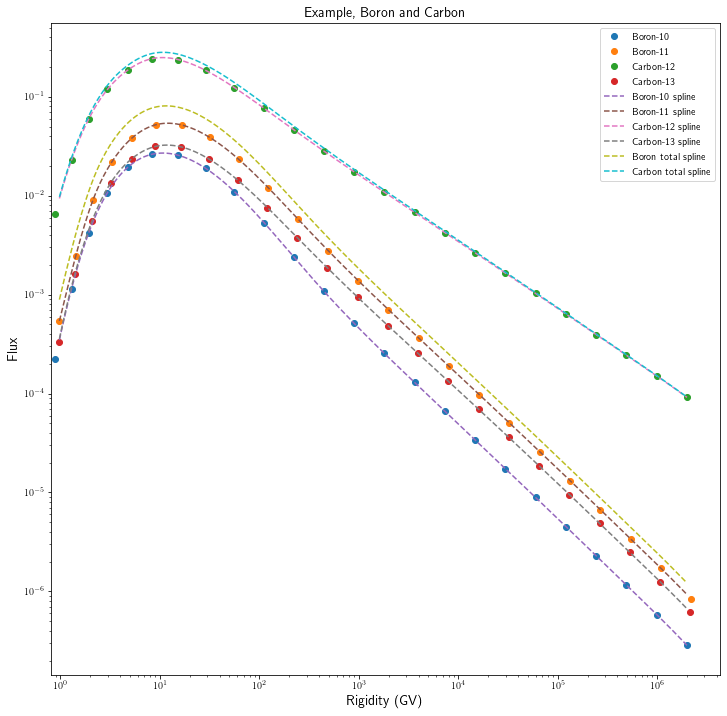

In [45]:
plt.figure(figsize=(12,12))
model=5
fnt=14
x1=0.9*rigB10[0]
x2=2*rigC13[-1]

plt.plot(rigB10,fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.boron10_loc)],'o',label="Boron-10")
plt.plot(rigB11,fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.boron11_loc)],'o',label="Boron-11")
plt.plot(rigC12,fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.carbon12_loc)],'o',label="Carbon-12")
plt.plot(rigC13,fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.carbon13_loc)],'o',label="Carbon-13")


plt.plot(rigB10_spline, B10_flux_spline,'--',label="Boron-10 spline")
plt.plot(rigB11_spline, B11_flux_spline,'--',label="Boron-11 spline")
plt.plot(rigC12_spline, C12_flux_spline,'--',label="Carbon-12 spline")
plt.plot(rigC13_spline, C13_flux_spline,'--',label="Carbon-13 spline")

plt.plot(rigB11_spline, B_total_flux_spline,'--',label="Boron total spline")
plt.plot(rigC13_spline, C_total_flux_spline,'--',label="Carbon total spline")

#plt.plot(energy,be_10_be_9_5,'-o',label="L=5")
plt.xscale("log")
plt.xlabel("Rigidity (GV)",fontsize=fnt)
plt.xticks(fontsize=fnt-4)
plt.yscale("log")
plt.ylabel("Flux",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
plt.xlim([x1,x2])
plt.legend(loc='upper right', fontsize=fnt-4)
plt.title("Example, Boron and Carbon", fontsize=fnt)
plt.savefig("Boron_carbon_flux_rigidity_with_splines_all_isotopes_constrained_region.png")
plt.show()

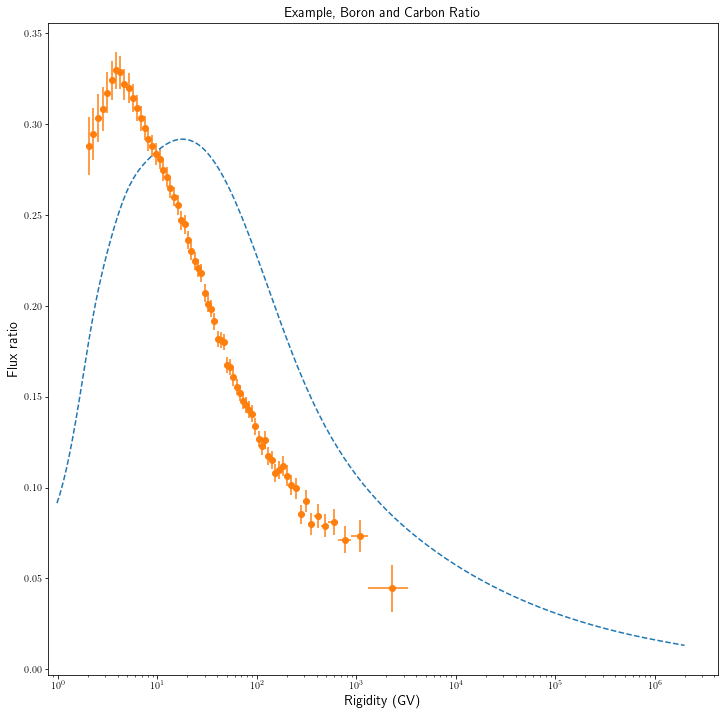

In [46]:
plt.figure(figsize=(12,12))
model=5
fnt=14
x1=0.9*rigB10[0]
x2=2*rigC13[-1]

plt.plot(rigC13_spline, B_C_ratio_spline,'--',label="Ratio spline")
plt.errorbar(rigidity,ratio,xerr=rigidity_binsize,yerr=ratio_errors,fmt='o',label="AMS")

#plt.plot(energy,be_10_be_9_5,'-o',label="L=5")
plt.xscale("log")
plt.xlabel("Rigidity (GV)",fontsize=fnt)
plt.xticks(fontsize=fnt-4)
plt.ylabel("Flux ratio",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
plt.xlim([x1,x2])
plt.title("Example, Boron and Carbon Ratio", fontsize=fnt)
plt.savefig("Boron_carbon_fluxratio_rigidity_splines.png")
plt.show()

In [35]:
def read_in_data(numerator,denominator,path):
    extension='ams_data.csv'
    read_file=path+numerator+'_'+denominator+'_'+extension
    ams=pd.read_csv(read_file)
    print(ams.head())
    return ams

In [36]:
numerator='B'
denominator='C'
path='C:\\Users\\kreativekeith422\\Downloads\\AMS_Data\\Ratios\\'
df=read_in_data(numerator,denominator,path)

   R_low  R_high  _B_C_ratio   _stat    _acc    _unf  _scale    _sys
0   1.92    2.15      0.2880  0.0016  0.0151  0.0052  0.0002  0.0160
1   2.15    2.40      0.2947  0.0014  0.0138  0.0031  0.0002  0.0142
2   2.40    2.67      0.3033  0.0013  0.0128  0.0026  0.0002  0.0131
3   2.67    2.97      0.3086  0.0013  0.0118  0.0022  0.0002  0.0120
4   2.97    3.29      0.3173  0.0012  0.0111  0.0019  0.0001  0.0112


In [37]:
def make_energies_and_errors(df,num,den):
    rigidity=np.array((df.R_low.values,df.R_high.values.T))
    rigidity_mp=(rigidity[0,:]+rigidity[1,:])/2.0
    rigidity_binsize=(rigidity[1,:]-rigidity[0,:])/2.0
    ratio_name='_'+str(num)+'_'+str(den)+'_'+'ratio'
    ratio=np.array(df[ratio_name].values)
    ratio_sys_errors=np.array(df._sys.values)
    ratio_stat_errors=np.array(df._stat.values)
    ratio_errors=np.sqrt(np.square(ratio_stat_errors)+np.square(ratio_sys_errors))
    return rigidity_mp,rigidity_binsize,ratio,ratio_errors

In [38]:
rigidity,rigidity_binsize,ratio,ratio_errors=make_energies_and_errors(df,numerator,denominator)
rigidity[0]
rigidity_binsize[0]
ratio[0]
df.tail()

,R_low,R_high,_B_C_ratio,_stat,_acc,_unf,_scale,_sys
62,441.0,525.0,0.0791,0.0055,0.0025,0.0025,0.0006,0.0036
63,525.0,660.0,0.0810,0.0058,0.0025,0.0031,0.0007,0.0041
64,660.0,880.0,0.0712,0.0060,0.0023,0.0036,0.0007,0.0044
65,880.0,1300.0,0.0733,0.0068,0.0023,0.0053,0.0007,0.0059
66,1300.0,3300.0,0.0446,0.0124,0.0021,0.0032,0.0005,0.0039


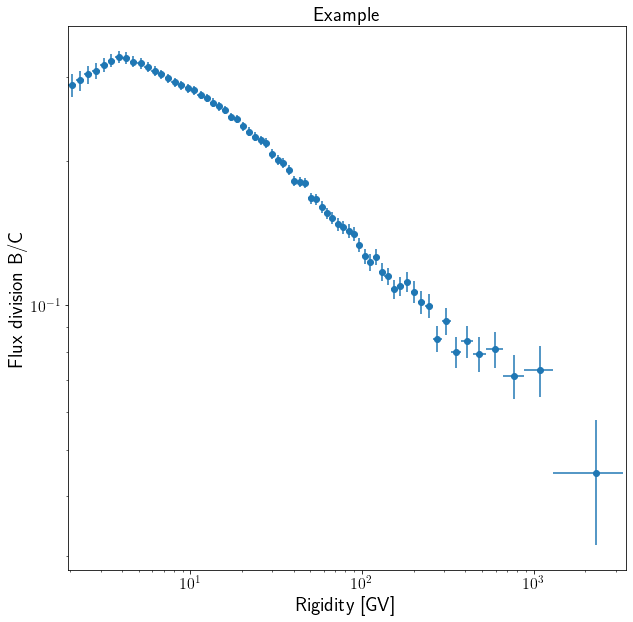

In [39]:
fnt=20
x1=rigidity[0]-0.1
x2=1.5*rigidity[-1]
#y1=ratio[0]
#y2=5*10**-1
plt.figure(figsize=(10,10))
plt.errorbar(rigidity,ratio,xerr=rigidity_binsize,yerr=ratio_errors,fmt='o',label="AMS")
#plt.plot(energy,he_3_4_2,'-o',label="L=2")
#plt.plot(energy,he_3_4_3,'-o',label="L=3")
#plt.plot(energy,he_3_4_4,'-o',label="L=4")
#plt.plot(energy,he_3_4_5,'-o',label="L=5")
plt.xscale("log")
plt.xlabel("Rigidity [GV]",fontsize=fnt)
plt.xticks(fontsize=fnt-4)
plt.yscale("log")
plt.ylabel("Flux division "+numerator+"/"+denominator,fontsize=fnt)
plt.yticks(fontsize=fnt-4)
plt.xlim([x1,x2])
#plt.ylim([y1,y2])
#plt.legend(loc='lower right', fontsize=fnt-4)
plt.title("Example", fontsize=fnt)
plt.savefig(numerator+"_"+denominator+"_ams_data.png")
plt.show()